In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,BaggingRegressor,GradientBoostingRegressor
import xgboost
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv("laptop_data.csv")
df.head()

Unnamed: 0 Company   TypeName  Inches                    ScreenResolution  \
0           0   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
1           1   Apple  Ultrabook    13.3                            1440x900   
2           2      HP   Notebook    15.6                   Full HD 1920x1080   
3           3   Apple  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
4           4   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   

                          Cpu   Ram               Memory  \
0        Intel Core i5 2.3GHz   8GB            128GB SSD   
1        Intel Core i5 1.8GHz   8GB  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz   8GB            256GB SSD   
3        Intel Core i7 2.7GHz  16GB            512GB SSD   
4        Intel Core i5 3.1GHz   8GB            256GB SSD   

                            Gpu  OpSys  Weight        Price  
0  Intel Iris Plus Graphics 640  macOS  1.37kg   71378.6832  
1        Intel HD Graphics 6000  macOS  1.34kg   47895.5232  
2         Intel HD Graphics 620  No OS  1.86kg   30636.0000  
3            AMD Radeon Pro 455  macOS  1.83kg  135195.3360  
4  Intel Iris Plus Graphics 650  macOS  1.37kg   96095.8080

In [3]:
df.shape

(1303, 12)

In [4]:
df.dtypes

Unnamed: 0            int64
Company              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price               float64
dtype: object

In [5]:
df.duplicated().sum()

0

In [6]:
df.isna().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [7]:
df.drop("Unnamed: 0",axis=1,inplace=True)
df.head()

Company   TypeName  Inches                    ScreenResolution  \
0   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
1   Apple  Ultrabook    13.3                            1440x900   
2      HP   Notebook    15.6                   Full HD 1920x1080   
3   Apple  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
4   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   

                          Cpu   Ram               Memory  \
0        Intel Core i5 2.3GHz   8GB            128GB SSD   
1        Intel Core i5 1.8GHz   8GB  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz   8GB            256GB SSD   
3        Intel Core i7 2.7GHz  16GB            512GB SSD   
4        Intel Core i5 3.1GHz   8GB            256GB SSD   

                            Gpu  OpSys  Weight        Price  
0  Intel Iris Plus Graphics 640  macOS  1.37kg   71378.6832  
1        Intel HD Graphics 6000  macOS  1.34kg   47895.5232  
2         Intel HD Graphics 620  No OS  1.86kg   30636.0000  
3            AMD Radeon Pro 455  macOS  1.83kg  135195.3360  
4  Intel Iris Plus Graphics 650  macOS  1.37kg   96095.8080

In [8]:
df["Ram"].unique()

array(['8GB', '16GB', '4GB', '2GB', '12GB', '6GB', '32GB', '24GB', '64GB'],
      dtype=object)

In [9]:
df["Ram"] = df["Ram"].map(lambda x: x.split("G")[0])
df["Ram"] = df["Ram"].astype("int64")

In [10]:
df["Ram"].unique()

array([ 8, 16,  4,  2, 12,  6, 32, 24, 64], dtype=int64)

In [11]:
df["Weight"]

0       1.37kg
1       1.34kg
2       1.86kg
3       1.83kg
4       1.37kg
         ...  
1298     1.8kg
1299     1.3kg
1300     1.5kg
1301    2.19kg
1302     2.2kg
Name: Weight, Length: 1303, dtype: object

In [12]:
df["Weight"] = df["Weight"].map(lambda x: x.split("k")[0])
df["Weight"] = df["Weight"].astype(float)

In [13]:
df.dtypes

Company              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                   int64
Memory               object
Gpu                  object
OpSys                object
Weight              float64
Price               float64
dtype: object

In [14]:
df.head()

Company   TypeName  Inches                    ScreenResolution  \
0   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
1   Apple  Ultrabook    13.3                            1440x900   
2      HP   Notebook    15.6                   Full HD 1920x1080   
3   Apple  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
4   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   

                          Cpu  Ram               Memory  \
0        Intel Core i5 2.3GHz    8            128GB SSD   
1        Intel Core i5 1.8GHz    8  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz    8            256GB SSD   
3        Intel Core i7 2.7GHz   16            512GB SSD   
4        Intel Core i5 3.1GHz    8            256GB SSD   

                            Gpu  OpSys  Weight        Price  
0  Intel Iris Plus Graphics 640  macOS    1.37   71378.6832  
1        Intel HD Graphics 6000  macOS    1.34   47895.5232  
2         Intel HD Graphics 620  No OS    1.86   30636.0000  
3            AMD Radeon Pro 455  macOS    1.83  135195.3360  
4  Intel Iris Plus Graphics 650  macOS    1.37   96095.8080

<AxesSubplot:>

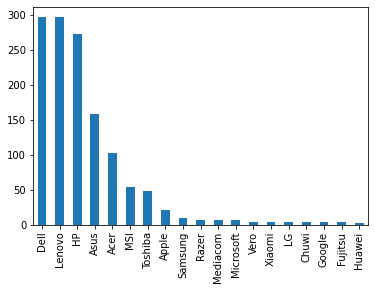

In [15]:
df["Company"].value_counts().plot(kind="bar")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

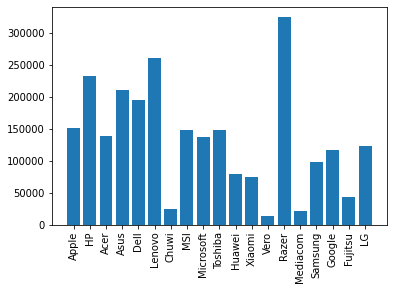

In [16]:
plt.bar(df["Company"],df["Price"])
plt.xticks(rotation="vertical")

In [17]:
df.groupby("Company").mean()["Price"].sort_values(ascending=False)

Company
Razer        178282.491429
LG           111834.720000
MSI           92116.226133
Google        89386.080000
Microsoft     85903.788000
Apple         83340.499886
Huawei        75870.720000
Samsung       75308.320000
Toshiba       67549.050000
Dell          63193.755782
Xiaomi        60390.882000
Asus          58830.143878
Lenovo        57882.563200
HP            56891.044222
Fujitsu       38841.120000
Acer          33394.615969
Chuwi         16745.726400
Mediacom      15717.600000
Vero          11584.404000
Name: Price, dtype: float64

<AxesSubplot:>

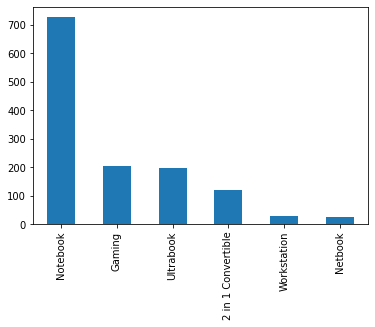

In [18]:
df["TypeName"].value_counts().plot(kind="bar")

In [19]:
df.groupby("TypeName").mean()["Price"].sort_values(ascending=False)

TypeName
Workstation           121497.525683
Gaming                 92247.960187
Ultrabook              82489.713429
2 in 1 Convertible     68326.360066
Notebook               41669.149113
Netbook                33898.440960
Name: Price, dtype: float64

c:\users\saura\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Ultrabook'),
  Text(1, 0, 'Notebook'),
  Text(2, 0, 'Netbook'),
  Text(3, 0, 'Gaming'),
  Text(4, 0, '2 in 1 Convertible'),
  Text(5, 0, 'Workstation')])

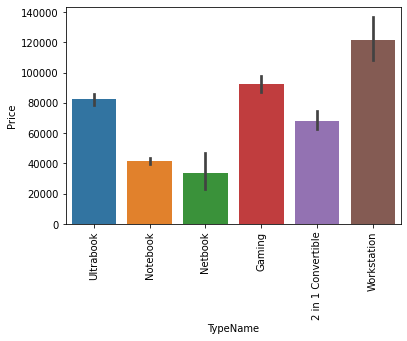

In [20]:
sns.barplot(df["TypeName"],df["Price"])
plt.xticks(rotation="vertical")

<AxesSubplot:xlabel='Inches', ylabel='Density'>

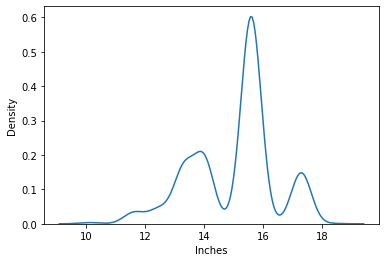

In [21]:
sns.kdeplot(df["Inches"])

c:\users\saura\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Inches', ylabel='Price'>

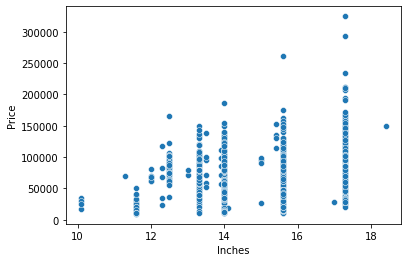

In [22]:
sns.scatterplot(df["Inches"],df["Price"])

In [23]:
df["ScreenResolution"].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
IPS Panel 1366x768                                 7
Touchscreen 2560x1440                              7
4K Ultra HD 3840x2160                              7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
Touchscreen 2256x1504                              6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
IPS Panel Touchscreen 2560x1440               

In [24]:
df["Touchscreen"] = df["ScreenResolution"].apply(lambda x: 1 if "Touchscreen" in x else 0)
df.head()

Company   TypeName  Inches                    ScreenResolution  \
0   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
1   Apple  Ultrabook    13.3                            1440x900   
2      HP   Notebook    15.6                   Full HD 1920x1080   
3   Apple  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
4   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   

                          Cpu  Ram               Memory  \
0        Intel Core i5 2.3GHz    8            128GB SSD   
1        Intel Core i5 1.8GHz    8  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz    8            256GB SSD   
3        Intel Core i7 2.7GHz   16            512GB SSD   
4        Intel Core i5 3.1GHz    8            256GB SSD   

                            Gpu  OpSys  Weight        Price  Touchscreen  
0  Intel Iris Plus Graphics 640  macOS    1.37   71378.6832            0  
1        Intel HD Graphics 6000  macOS    1.34   47895.5232            0  
2         Intel HD Graphics 620  No OS    1.86   30636.0000            0  
3            AMD Radeon Pro 455  macOS    1.83  135195.3360            0  
4  Intel Iris Plus Graphics 650  macOS    1.37   96095.8080            0

In [25]:
df["Touchscreen"].value_counts()

0    1111
1     192
Name: Touchscreen, dtype: int64

c:\users\saura\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Touchscreen', ylabel='Price'>

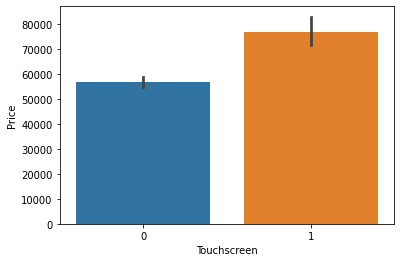

In [26]:
sns.barplot(df["Touchscreen"],df["Price"])

In [27]:
df["Ips"] = df["ScreenResolution"].apply(lambda x: 1 if "IPS" in x else 0)
df.head()

Company   TypeName  Inches                    ScreenResolution  \
0   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
1   Apple  Ultrabook    13.3                            1440x900   
2      HP   Notebook    15.6                   Full HD 1920x1080   
3   Apple  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
4   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   

                          Cpu  Ram               Memory  \
0        Intel Core i5 2.3GHz    8            128GB SSD   
1        Intel Core i5 1.8GHz    8  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz    8            256GB SSD   
3        Intel Core i7 2.7GHz   16            512GB SSD   
4        Intel Core i5 3.1GHz    8            256GB SSD   

                            Gpu  OpSys  Weight        Price  Touchscreen  Ips  
0  Intel Iris Plus Graphics 640  macOS    1.37   71378.6832            0    1  
1        Intel HD Graphics 6000  macOS    1.34   47895.5232            0    0  
2         Intel HD Graphics 620  No OS    1.86   30636.0000            0    0  
3            AMD Radeon Pro 455  macOS    1.83  135195.3360            0    1  
4  Intel Iris Plus Graphics 650  macOS    1.37   96095.8080            0    1

In [28]:
df["Ips"].value_counts()

0    938
1    365
Name: Ips, dtype: int64

c:\users\saura\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Ips', ylabel='Price'>

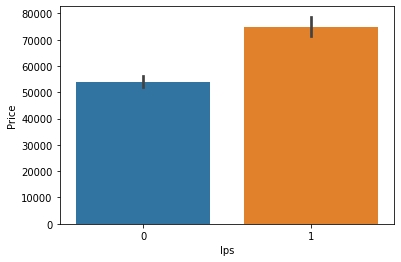

In [29]:
sns.barplot(df["Ips"],df["Price"])

In [30]:
s = df["ScreenResolution"].str.split("x",n=1,expand=True)

In [31]:
df["X_res"] = s[0]
df["Y_res"] = s[1]

In [32]:
df.head()

Company   TypeName  Inches                    ScreenResolution  \
0   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
1   Apple  Ultrabook    13.3                            1440x900   
2      HP   Notebook    15.6                   Full HD 1920x1080   
3   Apple  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
4   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   

                          Cpu  Ram               Memory  \
0        Intel Core i5 2.3GHz    8            128GB SSD   
1        Intel Core i5 1.8GHz    8  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz    8            256GB SSD   
3        Intel Core i7 2.7GHz   16            512GB SSD   
4        Intel Core i5 3.1GHz    8            256GB SSD   

                            Gpu  OpSys  Weight        Price  Touchscreen  Ips  \
0  Intel Iris Plus Graphics 640  macOS    1.37   71378.6832            0    1   
1        Intel HD Graphics 6000  macOS    1.34   47895.5232            0    0   
2         Intel HD Graphics 620  No OS    1.86   30636.0000            0    0   
3            AMD Radeon Pro 455  macOS    1.83  135195.3360            0    1   
4  Intel Iris Plus Graphics 650  macOS    1.37   96095.8080            0    1   

                           X_res Y_res  
0  IPS Panel Retina Display 2560  1600  
1                           1440   900  
2                   Full HD 1920  1080  
3  IPS Panel Retina Display 2880  1800  
4  IPS Panel Retina Display 2560  1600

In [33]:
df["X_res"] = df["X_res"].str.replace(",","").str.findall(r'(\d+\.?\d+)').apply(lambda x : x[0])

In [34]:
df["X_res"] = df["X_res"].astype("int64")
df["Y_res"] = df["Y_res"].astype("int64")

In [35]:
df.dtypes

Company              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                   int64
Memory               object
Gpu                  object
OpSys                object
Weight              float64
Price               float64
Touchscreen           int64
Ips                   int64
X_res                 int64
Y_res                 int64
dtype: object

<AxesSubplot:>

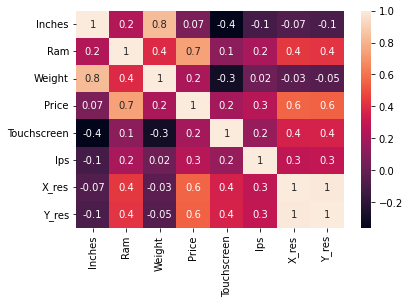

In [36]:
sns.heatmap(df.corr(),fmt='.1g',annot=True)

In [37]:
df["Ppi"] = (((df["X_res"]**2) + (df["Y_res"]**2))**0.5 / df["Inches"]).astype(float)

In [38]:
df.head()

Company   TypeName  Inches                    ScreenResolution  \
0   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
1   Apple  Ultrabook    13.3                            1440x900   
2      HP   Notebook    15.6                   Full HD 1920x1080   
3   Apple  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
4   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   

                          Cpu  Ram               Memory  \
0        Intel Core i5 2.3GHz    8            128GB SSD   
1        Intel Core i5 1.8GHz    8  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz    8            256GB SSD   
3        Intel Core i7 2.7GHz   16            512GB SSD   
4        Intel Core i5 3.1GHz    8            256GB SSD   

                            Gpu  OpSys  Weight        Price  Touchscreen  Ips  \
0  Intel Iris Plus Graphics 640  macOS    1.37   71378.6832            0    1   
1        Intel HD Graphics 6000  macOS    1.34   47895.5232            0    0   
2         Intel HD Graphics 620  No OS    1.86   30636.0000            0    0   
3            AMD Radeon Pro 455  macOS    1.83  135195.3360            0    1   
4  Intel Iris Plus Graphics 650  macOS    1.37   96095.8080            0    1   

   X_res  Y_res         Ppi  
0   2560   1600  226.983005  
1   1440    900  127.677940  
2   1920   1080  141.211998  
3   2880   1800  220.534624  
4   2560   1600  226.983005

In [39]:
df.drop("ScreenResolution",axis=1,inplace=True)

In [40]:
df.head()

Company   TypeName  Inches                         Cpu  Ram  \
0   Apple  Ultrabook    13.3        Intel Core i5 2.3GHz    8   
1   Apple  Ultrabook    13.3        Intel Core i5 1.8GHz    8   
2      HP   Notebook    15.6  Intel Core i5 7200U 2.5GHz    8   
3   Apple  Ultrabook    15.4        Intel Core i7 2.7GHz   16   
4   Apple  Ultrabook    13.3        Intel Core i5 3.1GHz    8   

                Memory                           Gpu  OpSys  Weight  \
0            128GB SSD  Intel Iris Plus Graphics 640  macOS    1.37   
1  128GB Flash Storage        Intel HD Graphics 6000  macOS    1.34   
2            256GB SSD         Intel HD Graphics 620  No OS    1.86   
3            512GB SSD            AMD Radeon Pro 455  macOS    1.83   
4            256GB SSD  Intel Iris Plus Graphics 650  macOS    1.37   

         Price  Touchscreen  Ips  X_res  Y_res         Ppi  
0   71378.6832            0    1   2560   1600  226.983005  
1   47895.5232            0    0   1440    900  127.677940  
2   30636.0000            0    0   1920   1080  141.211998  
3  135195.3360            0    1   2880   1800  220.534624  
4   96095.8080            0    1   2560   1600  226.983005

In [41]:
df.drop(["X_res","Y_res","Inches"],axis=1,inplace=True)

In [42]:
df.head()

Company   TypeName                         Cpu  Ram               Memory  \
0   Apple  Ultrabook        Intel Core i5 2.3GHz    8            128GB SSD   
1   Apple  Ultrabook        Intel Core i5 1.8GHz    8  128GB Flash Storage   
2      HP   Notebook  Intel Core i5 7200U 2.5GHz    8            256GB SSD   
3   Apple  Ultrabook        Intel Core i7 2.7GHz   16            512GB SSD   
4   Apple  Ultrabook        Intel Core i5 3.1GHz    8            256GB SSD   

                            Gpu  OpSys  Weight        Price  Touchscreen  Ips  \
0  Intel Iris Plus Graphics 640  macOS    1.37   71378.6832            0    1   
1        Intel HD Graphics 6000  macOS    1.34   47895.5232            0    0   
2         Intel HD Graphics 620  No OS    1.86   30636.0000            0    0   
3            AMD Radeon Pro 455  macOS    1.83  135195.3360            0    1   
4  Intel Iris Plus Graphics 650  macOS    1.37   96095.8080            0    1   

          Ppi  
0  226.983005  
1  127.677940  
2  141.211998  
3  220.534624  
4  226.983005

In [43]:
df["Cpu"].value_counts()

Intel Core i5 7200U 2.5GHz               190
Intel Core i7 7700HQ 2.8GHz              146
Intel Core i7 7500U 2.7GHz               134
Intel Core i7 8550U 1.8GHz                73
Intel Core i5 8250U 1.6GHz                72
                                        ... 
AMD E-Series 9000e 1.5GHz                  1
Intel Atom Z8350 1.92GHz                   1
Intel Celeron Dual Core N3060 1.60GHz      1
AMD A6-Series 7310 2GHz                    1
Intel Core M M3-6Y30 0.9GHz                1
Name: Cpu, Length: 118, dtype: int64

In [44]:
df["Cpu_name"] = df["Cpu"].apply(lambda x:" ".join(x.split()[0:3]))

In [45]:
df.sample(10)

Company            TypeName                                   Cpu  Ram  \
420  Lenovo  2 in 1 Convertible           Intel Core i7 7700HQ 2.8GHz   16   
890      HP            Notebook            Intel Core i5 7200U 2.5GHz    4   
216  Lenovo            Notebook            Intel Core i5 7200U 2.5GHz    8   
868    Acer            Notebook            Intel Core i5 7200U 2.5GHz    8   
568  Lenovo            Notebook  Intel Pentium Quad Core N4200 1.1GHz    4   
12    Apple           Ultrabook                  Intel Core i7 2.8GHz   16   
922      HP           Ultrabook            Intel Core i7 7500U 2.7GHz    8   
658  Lenovo              Gaming           Intel Core i7 6700HQ 2.6GHz    8   
714    Dell            Notebook            Intel Core i5 7300U 2.6GHz   16   
705    Dell            Notebook            Intel Core i5 7200U 2.5GHz    8   

                   Memory                       Gpu       OpSys  Weight  \
420             512GB SSD   Nvidia GeForce GTX 1050  Windows 10    2.00   
890             128GB SSD     Intel HD Graphics 620  Windows 10    1.95   
216               1TB HDD  Nvidia GeForce GTX 940MX       No OS    2.80   
868             256GB SSD     Intel HD Graphics 620  Windows 10    1.56   
568             500GB HDD     Intel HD Graphics 505  Windows 10    2.20   
12              256GB SSD        AMD Radeon Pro 555       macOS    1.83   
922             256GB SSD     Intel HD Graphics 620  Windows 10    1.39   
658  128GB SSD +  1TB HDD    Nvidia GeForce GTX 960  Windows 10    3.31   
714             512GB SSD     Intel HD Graphics 620  Windows 10    1.93   
705             256GB SSD     Intel HD Graphics 620  Windows 10    2.18   

           Price  Touchscreen  Ips         Ppi            Cpu_name  
420  101178.7200            1    1  282.423996       Intel Core i7  
890   67399.2000            0    0  157.350512       Intel Core i5  
216   31381.9200            0    0  106.113062       Intel Core i5  
868   48058.5600            0    1  157.350512       Intel Core i5  
568   18328.3200            0    0  141.211998  Intel Pentium Quad  
12   130001.6016            0    1  220.534624       Intel Core i7  
922   61218.7200            1    0  276.053530       Intel Core i7  
658   63722.8800            0    1  141.211998       Intel Core i7  
714   76012.4448            0    0  141.211998       Intel Core i5  
705   42357.6000            0    0  141.211998       Intel Core i5

In [46]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [47]:
df.head()

Company   TypeName                         Cpu  Ram               Memory  \
0   Apple  Ultrabook        Intel Core i5 2.3GHz    8            128GB SSD   
1   Apple  Ultrabook        Intel Core i5 1.8GHz    8  128GB Flash Storage   
2      HP   Notebook  Intel Core i5 7200U 2.5GHz    8            256GB SSD   
3   Apple  Ultrabook        Intel Core i7 2.7GHz   16            512GB SSD   
4   Apple  Ultrabook        Intel Core i5 3.1GHz    8            256GB SSD   

                            Gpu  OpSys  Weight        Price  Touchscreen  Ips  \
0  Intel Iris Plus Graphics 640  macOS    1.37   71378.6832            0    1   
1        Intel HD Graphics 6000  macOS    1.34   47895.5232            0    0   
2         Intel HD Graphics 620  No OS    1.86   30636.0000            0    0   
3            AMD Radeon Pro 455  macOS    1.83  135195.3360            0    1   
4  Intel Iris Plus Graphics 650  macOS    1.37   96095.8080            0    1   

          Ppi       Cpu_name  
0  226.983005  Intel Core i5  
1  127.677940  Intel Core i5  
2  141.211998  Intel Core i5  
3  220.534624  Intel Core i7  
4  226.983005  Intel Core i5

In [48]:
df["Cpu brand"] = df["Cpu_name"].apply(fetch_processor)

In [49]:
df["Cpu brand"].value_counts()

Intel Core i7            527
Intel Core i5            423
Other Intel Processor    154
Intel Core i3            136
AMD Processor             63
Name: Cpu brand, dtype: int64

c:\users\saura\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Intel Core i5'),
  Text(1, 0, 'Intel Core i7'),
  Text(2, 0, 'AMD Processor'),
  Text(3, 0, 'Intel Core i3'),
  Text(4, 0, 'Other Intel Processor')])

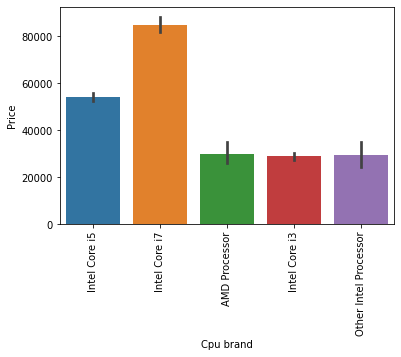

In [50]:
sns.barplot(df["Cpu brand"],df["Price"])
plt.xticks(rotation="vertical")

In [51]:
df.drop(["Cpu","Cpu_name"],inplace=True,axis=1)

In [52]:
df.head()

Company   TypeName  Ram               Memory                           Gpu  \
0   Apple  Ultrabook    8            128GB SSD  Intel Iris Plus Graphics 640   
1   Apple  Ultrabook    8  128GB Flash Storage        Intel HD Graphics 6000   
2      HP   Notebook    8            256GB SSD         Intel HD Graphics 620   
3   Apple  Ultrabook   16            512GB SSD            AMD Radeon Pro 455   
4   Apple  Ultrabook    8            256GB SSD  Intel Iris Plus Graphics 650   

   OpSys  Weight        Price  Touchscreen  Ips         Ppi      Cpu brand  
0  macOS    1.37   71378.6832            0    1  226.983005  Intel Core i5  
1  macOS    1.34   47895.5232            0    0  127.677940  Intel Core i5  
2  No OS    1.86   30636.0000            0    0  141.211998  Intel Core i5  
3  macOS    1.83  135195.3360            0    1  220.534624  Intel Core i7  
4  macOS    1.37   96095.8080            0    1  226.983005  Intel Core i5

c:\users\saura\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '2'),
  Text(1, 0, '4'),
  Text(2, 0, '6'),
  Text(3, 0, '8'),
  Text(4, 0, '12'),
  Text(5, 0, '16'),
  Text(6, 0, '24'),
  Text(7, 0, '32'),
  Text(8, 0, '64')])

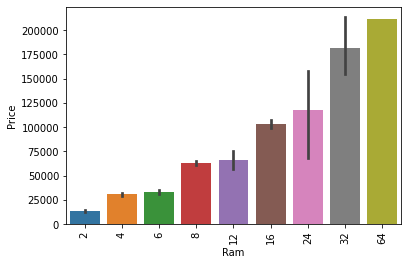

In [53]:
sns.barplot(df["Ram"],df["Price"])
plt.xticks(rotation="vertical")

In [54]:
df["Memory"].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
1TB SSD                           14
512GB SSD +  1TB HDD              14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
1TB SSD +  1TB HDD                 2
512GB Flash Storage                2
256GB SSD +  256GB SSD             2
128GB SSD +  2TB HDD               2
256GB SSD +  500GB HDD             2
240GB SSD                          1
1

In [55]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.replace(r'\D', '')

df["second"].fillna("0", inplace = True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D', '')

df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)


<ipython-input-55-10829db803de>:16: FutureWarning: The default value of regex will change from True to False in a future version.
  df['first'] = df['first'].str.replace(r'\D', '')
<ipython-input-55-10829db803de>:25: FutureWarning: The default value of regex will change from True to False in a future version.
  df['second'] = df['second'].str.replace(r'\D', '')


In [56]:
df.drop("Memory",axis=1,inplace=True)

In [57]:
df.head()

Company   TypeName  Ram                           Gpu  OpSys  Weight  \
0   Apple  Ultrabook    8  Intel Iris Plus Graphics 640  macOS    1.37   
1   Apple  Ultrabook    8        Intel HD Graphics 6000  macOS    1.34   
2      HP   Notebook    8         Intel HD Graphics 620  No OS    1.86   
3   Apple  Ultrabook   16            AMD Radeon Pro 455  macOS    1.83   
4   Apple  Ultrabook    8  Intel Iris Plus Graphics 650  macOS    1.37   

         Price  Touchscreen  Ips         Ppi      Cpu brand  HDD  SSD  Hybrid  \
0   71378.6832            0    1  226.983005  Intel Core i5    0  128       0   
1   47895.5232            0    0  127.677940  Intel Core i5    0    0       0   
2   30636.0000            0    0  141.211998  Intel Core i5    0  256       0   
3  135195.3360            0    1  220.534624  Intel Core i7    0  512       0   
4   96095.8080            0    1  226.983005  Intel Core i5    0  256       0   

   Flash_Storage  
0              0  
1            128  
2              0  
3              0  
4              0

<AxesSubplot:>

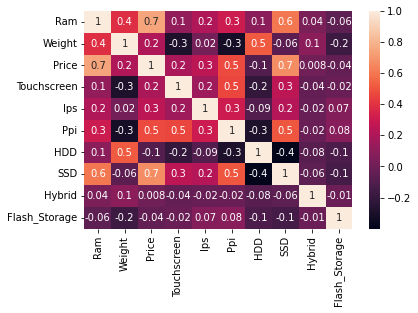

In [58]:
sns.heatmap(df.corr(),fmt='.1g',annot=True)

In [59]:
df.drop(["Hybrid","Flash_Storage"],inplace=True,axis=1)

In [60]:
df.head()

Company   TypeName  Ram                           Gpu  OpSys  Weight  \
0   Apple  Ultrabook    8  Intel Iris Plus Graphics 640  macOS    1.37   
1   Apple  Ultrabook    8        Intel HD Graphics 6000  macOS    1.34   
2      HP   Notebook    8         Intel HD Graphics 620  No OS    1.86   
3   Apple  Ultrabook   16            AMD Radeon Pro 455  macOS    1.83   
4   Apple  Ultrabook    8  Intel Iris Plus Graphics 650  macOS    1.37   

         Price  Touchscreen  Ips         Ppi      Cpu brand  HDD  SSD  
0   71378.6832            0    1  226.983005  Intel Core i5    0  128  
1   47895.5232            0    0  127.677940  Intel Core i5    0    0  
2   30636.0000            0    0  141.211998  Intel Core i5    0  256  
3  135195.3360            0    1  220.534624  Intel Core i7    0  512  
4   96095.8080            0    1  226.983005  Intel Core i5    0  256

In [61]:
df["Gpu"].value_counts()

Intel HD Graphics 620       281
Intel HD Graphics 520       185
Intel UHD Graphics 620       68
Nvidia GeForce GTX 1050      66
Nvidia GeForce GTX 1060      48
                           ... 
Nvidia GeForce GTX 1070M      1
AMD Radeon R7 Graphics        1
AMD Radeon R9 M385            1
AMD Radeon Pro 555            1
AMD Radeon R5 520             1
Name: Gpu, Length: 110, dtype: int64

In [62]:
df["Gpu_brand"] = df["Gpu"].apply(lambda x: x.split()[0])
df.head()

Company   TypeName  Ram                           Gpu  OpSys  Weight  \
0   Apple  Ultrabook    8  Intel Iris Plus Graphics 640  macOS    1.37   
1   Apple  Ultrabook    8        Intel HD Graphics 6000  macOS    1.34   
2      HP   Notebook    8         Intel HD Graphics 620  No OS    1.86   
3   Apple  Ultrabook   16            AMD Radeon Pro 455  macOS    1.83   
4   Apple  Ultrabook    8  Intel Iris Plus Graphics 650  macOS    1.37   

         Price  Touchscreen  Ips         Ppi      Cpu brand  HDD  SSD  \
0   71378.6832            0    1  226.983005  Intel Core i5    0  128   
1   47895.5232            0    0  127.677940  Intel Core i5    0    0   
2   30636.0000            0    0  141.211998  Intel Core i5    0  256   
3  135195.3360            0    1  220.534624  Intel Core i7    0  512   
4   96095.8080            0    1  226.983005  Intel Core i5    0  256   

  Gpu_brand  
0     Intel  
1     Intel  
2     Intel  
3       AMD  
4     Intel

In [63]:
df["Gpu_brand"].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu_brand, dtype: int64

In [64]:
df = df[df["Gpu_brand"] != "ARM"]

In [65]:
df["Gpu_brand"].value_counts()

Intel     722
Nvidia    400
AMD       180
Name: Gpu_brand, dtype: int64

c:\users\saura\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2]),
 [Text(0, 0, 'Intel'), Text(1, 0, 'AMD'), Text(2, 0, 'Nvidia')])

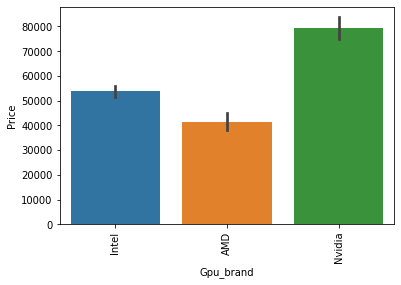

In [66]:
sns.barplot(df["Gpu_brand"],df["Price"])
plt.xticks(rotation="vertical")

In [67]:
df.drop("Gpu",inplace=True,axis=1)

In [68]:
df.head()

Company   TypeName  Ram  OpSys  Weight        Price  Touchscreen  Ips  \
0   Apple  Ultrabook    8  macOS    1.37   71378.6832            0    1   
1   Apple  Ultrabook    8  macOS    1.34   47895.5232            0    0   
2      HP   Notebook    8  No OS    1.86   30636.0000            0    0   
3   Apple  Ultrabook   16  macOS    1.83  135195.3360            0    1   
4   Apple  Ultrabook    8  macOS    1.37   96095.8080            0    1   

          Ppi      Cpu brand  HDD  SSD Gpu_brand  
0  226.983005  Intel Core i5    0  128     Intel  
1  127.677940  Intel Core i5    0    0     Intel  
2  141.211998  Intel Core i5    0  256     Intel  
3  220.534624  Intel Core i7    0  512       AMD  
4  226.983005  Intel Core i5    0  256     Intel

In [69]:
df["OpSys"].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Windows 10 S       8
Mac OS X           8
Android            2
Name: OpSys, dtype: int64

c:\users\saura\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'macOS'),
  Text(1, 0, 'No OS'),
  Text(2, 0, 'Windows 10'),
  Text(3, 0, 'Mac OS X'),
  Text(4, 0, 'Linux'),
  Text(5, 0, 'Android'),
  Text(6, 0, 'Windows 10 S'),
  Text(7, 0, 'Chrome OS'),
  Text(8, 0, 'Windows 7')])

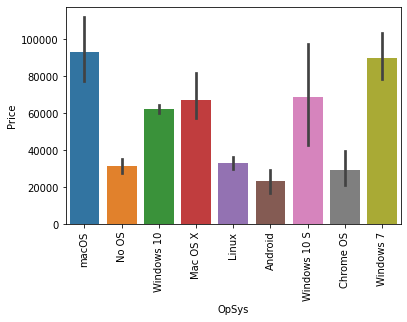

In [70]:
sns.barplot(df["OpSys"],df["Price"])
plt.xticks(rotation="vertical")

In [71]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [72]:
df["Os"] = df["OpSys"].apply(cat_os)

In [73]:
df["Os"].value_counts()

Windows               1125
Others/No OS/Linux     156
Mac                     21
Name: Os, dtype: int64

In [74]:
df.drop("OpSys",axis=1,inplace=True)

In [75]:
df.head()

Company   TypeName  Ram  Weight        Price  Touchscreen  Ips         Ppi  \
0   Apple  Ultrabook    8    1.37   71378.6832            0    1  226.983005   
1   Apple  Ultrabook    8    1.34   47895.5232            0    0  127.677940   
2      HP   Notebook    8    1.86   30636.0000            0    0  141.211998   
3   Apple  Ultrabook   16    1.83  135195.3360            0    1  220.534624   
4   Apple  Ultrabook    8    1.37   96095.8080            0    1  226.983005   

       Cpu brand  HDD  SSD Gpu_brand                  Os  
0  Intel Core i5    0  128     Intel                 Mac  
1  Intel Core i5    0    0     Intel                 Mac  
2  Intel Core i5    0  256     Intel  Others/No OS/Linux  
3  Intel Core i7    0  512       AMD                 Mac  
4  Intel Core i5    0  256     Intel                 Mac

<AxesSubplot:xlabel='Weight', ylabel='Density'>

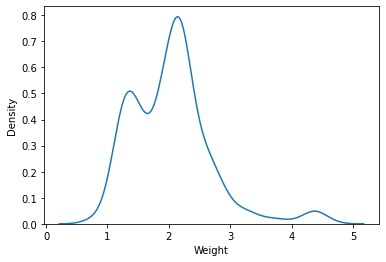

In [76]:
sns.kdeplot(df["Weight"])

<AxesSubplot:>

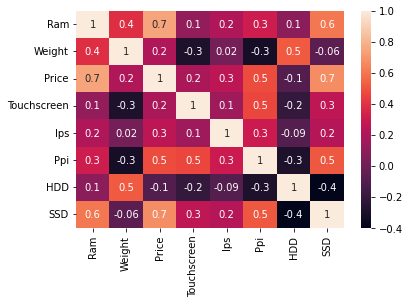

In [77]:
sns.heatmap(df.corr(),fmt='.1g',annot=True)

<AxesSubplot:xlabel='Price', ylabel='Density'>

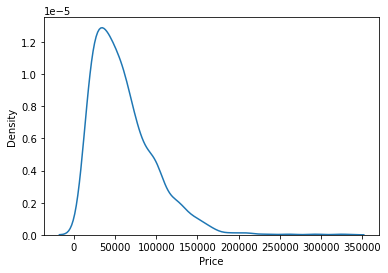

In [78]:
sns.kdeplot(df["Price"])

<AxesSubplot:xlabel='Price', ylabel='Density'>

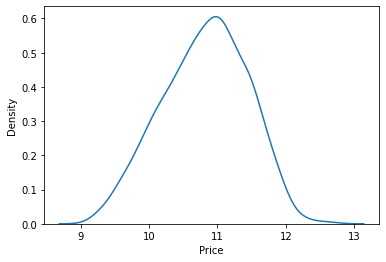

In [79]:
df["Price"] = np.log(df["Price"])
sns.kdeplot(df["Price"])

In [80]:
X = df.drop("Price",axis=1)
y = df.Price

In [81]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [82]:
X_train

Company            TypeName  Ram  Weight  Touchscreen  Ips         Ppi  \
183   Toshiba            Notebook    8    2.00            0    0  100.454670   
1141      MSI              Gaming    8    2.40            0    0  141.211998   
1049     Asus             Netbook    4    1.20            0    0  135.094211   
1020     Dell  2 in 1 Convertible    4    2.08            1    1  141.211998   
878      Dell            Notebook    4    2.18            0    0  141.211998   
...       ...                 ...  ...     ...          ...  ...         ...   
466      Acer            Notebook    4    2.20            0    0  100.454670   
299      Asus           Ultrabook   16    1.63            0    0  141.211998   
493      Acer            Notebook    8    2.20            0    0  100.454670   
527    Lenovo            Notebook    8    2.20            0    0  100.454670   
1193    Apple           Ultrabook    8    0.92            0    1  226.415547   

                  Cpu brand   HDD  SSD Gpu_brand                  Os  
183           Intel Core i5     0  128     Intel             Windows  
1141          Intel Core i7  1000  128    Nvidia             Windows  
1049  Other Intel Processor     0    0     Intel  Others/No OS/Linux  
1020          Intel Core i3  1000    0     Intel             Windows  
878           Intel Core i5  1000  128    Nvidia             Windows  
...                     ...   ...  ...       ...                 ...  
466           Intel Core i3   500    0    Nvidia             Windows  
299           Intel Core i7     0  512    Nvidia             Windows  
493           AMD Processor  1000    0       AMD             Windows  
527           Intel Core i3  2000    0    Nvidia  Others/No OS/Linux  
1193  Other Intel Processor     0    0     Intel                 Mac  

[1106 rows x 12 columns]

In [83]:
lr = LinearRegression()
dt = DecisionTreeRegressor()
rf =  RandomForestRegressor()
ad = AdaBoostRegressor()
bag = BaggingRegressor()
gb = GradientBoostingRegressor()
xg = xgboost.XGBRegressor()

In [84]:
step1 = ColumnTransformer(transformers = [
    ("col_tnf",OneHotEncoder(sparse=False,drop="first"),[0,1,7,10,11])
],remainder ="passthrough")

step2 = LinearRegression()



pipe = Pipeline([("step1",step1),("step2",step2)])



pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

0.8073277450155155
0.21017827953018997


In [85]:
step1 = ColumnTransformer(transformers = [
    ("col_tnf",OneHotEncoder(sparse=False,drop="first"),[0,1,7,10,11])
],remainder ="passthrough")

step2 = SVR()

pipe = Pipeline([("step1",step1),("step2",step2)])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

0.6110751844194183
0.29589619896726255


In [86]:
step1 = ColumnTransformer(transformers = [
    ("col_tnf",OneHotEncoder(sparse=False,drop="first"),[0,1,7,10,11])
],remainder ="passthrough")

step2 = RandomForestRegressor(n_estimators=200)

pipe = Pipeline([("step1",step1),("step2",step2)])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

0.8846167910854099
0.15569990703007835


In [87]:
step1 = ColumnTransformer(transformers = [
    ("col_tnf",OneHotEncoder(sparse=False,drop="first"),[0,1,7,10,11])
],remainder ="passthrough")

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([("step1",step1),("step2",step2)])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

0.8369653921976856
0.18497511566236483


In [88]:
step1 = ColumnTransformer(transformers = [
    ("col_tnf",OneHotEncoder(sparse=False,drop="first"),[0,1,7,10,11])
],remainder ="passthrough")

step2 = GradientBoostingRegressor(n_estimators=200)

pipe = Pipeline([("step1",step1),("step2",step2)])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

0.8794757713235108
0.1647133317252711


In [89]:
step1 = ColumnTransformer(transformers = [
    ("col_tnf",OneHotEncoder(sparse=False,drop="first"),[0,1,7,10,11])
],remainder ="passthrough")

step2 = AdaBoostRegressor()

pipe = Pipeline([("step1",step1),("step2",step2)])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

0.7979283706229556
0.2244718352593091


In [90]:
step1 = ColumnTransformer(transformers = [
    ("col_tnf",OneHotEncoder(sparse=False,drop="first"),[0,1,7,10,11])
],remainder ="passthrough")

step2 = xgboost.XGBRegressor()

pipe = Pipeline([("step1",step1),("step2",step2)])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

0.874921070569052
0.16308269537169992


In [91]:
step1 = ColumnTransformer(transformers = [
    ("col_tnf",OneHotEncoder(sparse=False,drop="first"),[0,1,7,10,11])
],remainder ="passthrough")

step2 = BaggingRegressor(n_estimators=50)

pipe = Pipeline([("step1",step1),("step2",step2)])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

0.8831498176236028
0.1588977003602764


In [92]:
import pickle

In [93]:
pickle.dump(df,open("df.pkl","wb"))
pickle.dump(pipe,open("model.pkl","wb"))

In [94]:
df

Company            TypeName  Ram  Weight      Price  Touchscreen  Ips  \
0      Apple           Ultrabook    8    1.37  11.175755            0    1   
1      Apple           Ultrabook    8    1.34  10.776777            0    0   
2         HP            Notebook    8    1.86  10.329931            0    0   
3      Apple           Ultrabook   16    1.83  11.814476            0    1   
4      Apple           Ultrabook    8    1.37  11.473101            0    1   
...      ...                 ...  ...     ...        ...          ...  ...   
1298  Lenovo  2 in 1 Convertible    4    1.80  10.433899            1    1   
1299  Lenovo  2 in 1 Convertible   16    1.30  11.288115            1    1   
1300  Lenovo            Notebook    2    1.50   9.409283            0    0   
1301      HP            Notebook    6    2.19  10.614129            0    0   
1302    Asus            Notebook    4    2.20   9.886358            0    0   

             Ppi              Cpu brand   HDD  SSD Gpu_brand  \
0     226.983005          Intel Core i5     0  128     Intel   
1     127.677940          Intel Core i5     0    0     Intel   
2     141.211998          Intel Core i5     0  256     Intel   
3     220.534624          Intel Core i7     0  512       AMD   
4     226.983005          Intel Core i5     0  256     Intel   
...          ...                    ...   ...  ...       ...   
1298  157.350512          Intel Core i7     0  128     Intel   
1299  276.053530          Intel Core i7     0  512     Intel   
1300  111.935204  Other Intel Processor     0    0     Intel   
1301  100.454670          Intel Core i7  1000    0       AMD   
1302  100.454670  Other Intel Processor   500    0     Intel   

                      Os  
0                    Mac  
1                    Mac  
2     Others/No OS/Linux  
3                    Mac  
4                    Mac  
...                  ...  
1298             Windows  
1299             Windows  
1300             Windows  
1301             Windows  
1302             Windows  

[1302 rows x 13 columns]

In [95]:
df["Ram"].unique()

array([ 8, 16,  4,  2, 12,  6, 32, 24, 64], dtype=int64)